In [53]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import time
import re
import seaborn as sns
from lxml import html
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Получаем 250 самых топовых фильмов

In [12]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

Парсим страницу с фильмами и получаем грязные данные с


1.   Названием фильма
2.   Рейтингом
3.   Командой 
4.   Ссылкой на основную страницу




In [13]:
movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]

In [14]:
data_frame = {
    "movies": movies,
    "ratings": ratings,
    "crew": crew,
    "links": links
}

data = pd.DataFrame(data_frame)
data

,movies,ratings,crew,links
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235293962006075,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156155784257377,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.989609978773924,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984041085993328,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951091597472566,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/
...,...,...,...,...
245,"[\n 246.\n , [Дерсу Узала], \n, [(19...",8.006444034709912,"Akira Kurosawa (dir.), Maksim Munzuk, Yuriy So...",/title/tt0071411/
246,"[\n 247.\n , [Стальной гигант], \n, ...",8.00509423847881,"Brad Bird (dir.), Eli Marienthal, Harry Connic...",/title/tt0129167/
247,"[\n 248.\n , [Прислуга], \n, [(2011)...",8.005007423893236,"Tate Taylor (dir.), Viola Davis, Emma Stone",/title/tt1454029/
248,"[\n 249.\n , [Аладдин], \n, [(1992)]...",8.004982823411016,"Ron Clements (dir.), Scott Weinger, Robin Will...",/title/tt0103639/


Несколько функциий для преобзразования грязных заголовков с названием фильмов


In [15]:
def process_text_mv(text):
    data = text.get_text().split("\n")
    return data[2].strip()

In [16]:
def process_text_year(text):
    data = text.get_text().split("\n")
    return data[3].strip()[1:-1]

In [17]:
data["title"] = data.movies.apply(process_text_mv)
data["year"] = data.movies.apply(process_text_year)

In [18]:
data.head()

,movies,ratings,crew,links,title,year
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235293962006075,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,Побег из Шоушенка,1994
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156155784257377,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,Крёстный отец,1972
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.989609978773924,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,Темный рыцарь,2008
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984041085993328,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,Крёстный отец 2,1974
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951091597472566,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 рaзгневанных мужчин,1957


In [19]:
data.crew[1]

'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino'

Задача 1.
Получить список всех участников команд (убрать постфикс `(dir.)` у директоров). Найти количество уникальных имен. 

Задача 2.
Получить список всех директоров. Построить распределение (визуализация обязательна) и найти директора(ов), у которого(ых) больше всего фильмов в топе.

Задача 3. Найти участника(ов) команд, у которого(ых) больше всего фильмов в топе.

Задача 4. Построить распределение топовых фильмов по годам

Задача 5. Построить распределение топовых фильмов рейтингу:


*   Округлить до сотых и отрисовать
*   Округлить до десятых и отрисовать
*   Округлить до целых и отрисовать

Задача 6. Используйте ссылку `http://www.imdb.com/` и динамически добавляя ссылку на фильм из колонки `links` соберите описание фильмов. Пример поиска необходимого текст представлен ниже. Добавьте эту информацию в исходный датафрейм.










In [20]:
#1.
#создание списка из загруженных данных
crew_all=data["crew"].to_list()

In [21]:
#список для одной команды, которая сейчас строка
el=[]

In [33]:
#итоговый список всех участников команд
crew_all_new = []
i = 0
while i < len(crew_all):
    crew_all[i] = (crew_all[i].replace('(dir.)', ''))
    el = crew_all[i].split(',')
    el = [x.strip(' ') for x in el]
    crew_all_new = crew_all_new + el
    i += 1
print('Всего участников в сьемочных командах ', len(crew_all_new))

Всего участников в сьемочных командах  750


In [34]:
uniques = []
uniques = set()
for x in crew_all_new:
    uniques.add(x)
print('из них уникальных имен ', len(uniques))

из них уникальных имен  527


In [42]:
#2.
#Оригинальные данные по командам
crew_all = data["crew"].to_list()
el = []
crew_all_new = []
i = 0
while i < len(crew_all):
    el = crew_all[i].split(',')
    el = [x.strip(' ') for x in el]
    crew_all_new = crew_all_new+el
    i += 1
directors = []
for y in crew_all_new:
    if re.search('(dir.)', y):
        y = y.replace ('(dir.)', '')
        directors.append(y)
director = pd.Series(directors)
print ('Режиссеры с максимальным рейтингом:')
print (director.value_counts()[director.value_counts() == director.value_counts().max()])

Режиссеры с максимальным рейтингом:
Martin Scorsese       7
Akira Kurosawa        7
Christopher Nolan     7
Steven Spielberg      7
Stanley Kubrick       7
dtype: int64


In [43]:
crewman = pd.Series(crew_all_new)

print('Участники съемочных групп с максимальным рейтингом:', crewman.value_counts()[crewman.value_counts() == crewman.value_counts().max()])

Участники съемочных групп с максимальным рейтингом: Robert De Niro    9
dtype: int64


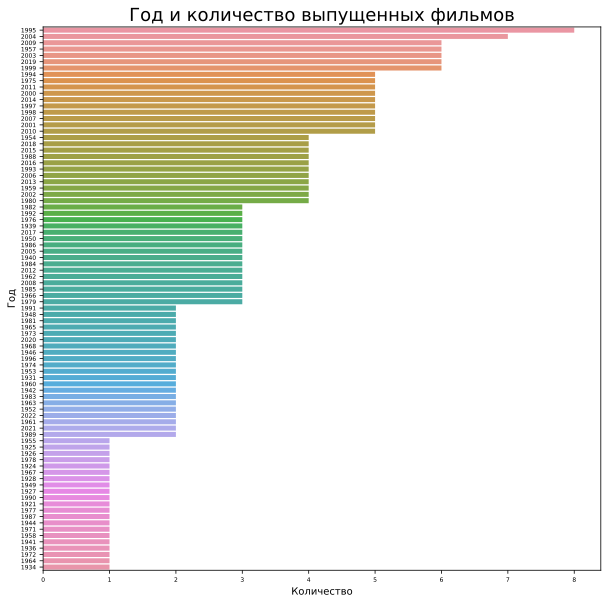

In [47]:
#4.
year_release = data["year"].value_counts()

year_release_vc = pd.DataFrame(year_release)
year_release_vc = year_release_vc.reset_index()
year_release_vc.columns = ['year', 'movies_released']
year_release_vc

ym = sns.barplot(x = 'movies_released', y = 'year', data = year_release_vc, orient = 'h')
ym.figure.set_size_inches(10, 10)
ym.axes.set_title('Год и количество выпущенных фильмов',fontsize=18)
ym.set_xlabel('Количество', fontsize = 10)
ym.set_ylabel('Год', fontsize = 10)
ym.tick_params(labelsize = 6)
#plt.show()

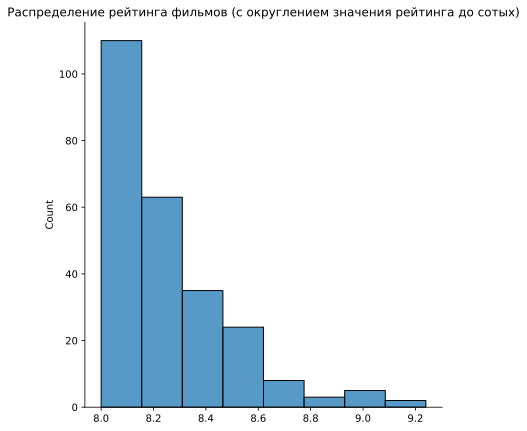

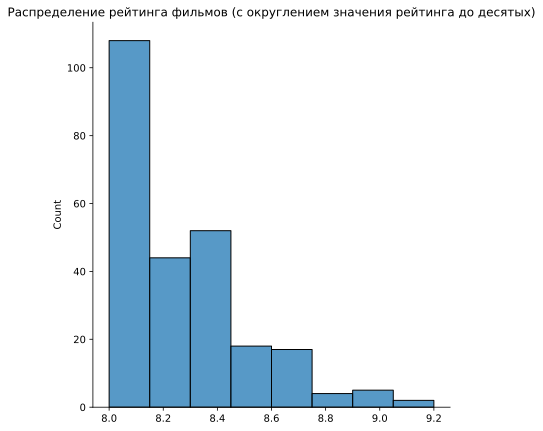

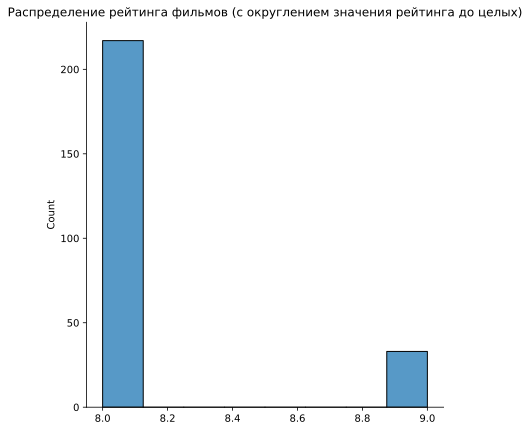

In [54]:
#5.
#Распределение частоты рейтинга
rating = pd.Series(data["ratings"]).to_list()

rating_string = np.array(rating)

gf1 = sns.displot(np.round(rating_string.astype(float), 2), bins = 8)
gf1.figure.set_size_inches(6, 6)
plt.title('Распределение рейтинга фильмов (с округлением значения рейтинга до сотых)')
plt.show()

gf2 = sns.displot(np.round(rating_string.astype(float), 1), bins = 8)
gf2.figure.set_size_inches(6, 6)
plt.title('Распределение рейтинга фильмов (с округлением значения рейтинга до десятых)')
plt.show()

gf3 = sns.displot(np.round(rating_string.astype(float), 0), bins = 8)
gf3.figure.set_size_inches(6, 6)
plt.title('Распределение рейтинга фильмов (с округлением значения рейтинга до целых)')
plt.show()

In [60]:
 film_url = 'http://www.imdb.com/title/tt0068646/'
 html_text = requests.get(film_url).text

In [61]:
soup = BeautifulSoup(html_text, 'lxml')
soup.find_all(attrs={"name": "description"})[0].get("content")

IndexError: list index out of range

In [84]:
#6.
#Список с описаниями фильмов
descriptions = []
base_url = 'http://www.imdb.com/'

link = data["links"].to_list()

i = 0
#while i < 2:
while i < len(link):
    movie_url = base_url + link[i][1:]

    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    result = requests.get(movie_url, headers = headers)

    bs = BeautifulSoup(result.text, "lxml")

    temp = bs.find_all(attrs = {"name": "description"})

    temp = str(temp).replace('[', '"').replace(']', '"')

    temp = re.search('meta content=(.+?)data-id', temp)

    if temp:
        description = temp.group(1)

    descriptions.append(description)    
    i += 1
print(descriptions)


['"Побег из Шоушенка: Directed by Frank Darabont. With Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler. Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency." ', '"Крёстный отец: Directed by Francis Ford Coppola. With Marlon Brando, Al Pacino, James Caan, Richard S. Castellano. The aging patriarch of an organized crime dynasty in postwar New York City transfers control of his clandestine empire to his reluctant youngest son." ', '"Темный рыцарь: Directed by Christopher Nolan. With Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine. When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice." ', '"Крёстный отец 2: Directed by Francis Ford Coppola. With Al Pacino, Robert Duvall, Diane Keaton, Robert De Niro. The early life and career of Vito Corleone in 1920s New York City is port


Задача 7. С помощью регулярных выражений найдите в текстах описания фильмов имена актеров, если это возможно (то есть - они там упоминаются). Добавьте эту информацию в датафрейм и посчитайте, для скольких фильмов получилось это сдлеать. Подсказка: перечисление актеров иногда начинается с with. 


Задача 8. Распарсите исходную страницу с топ-250 фильмов и получите для каждого фильмов количество оценок. Пример текста в исходной странице:`9.2 based on 2,554,919 user ratings`. Из этого текста нужно достать = `2,554,919`. Подсказка: используя метод `find_all` с аргументом `attrs` в который нужно передать `{'class': 'ratingColumn imdbRating'}` от страници `http://www.imdb.com/chart/top`. Найдите 10 фильмов (вывести их название и кол-во оценок) у которых, самое большое количество оценок.


Задача 9. Постройте топ 10 слов, которые встречаются 

1.   в названии фильмов
2.   в описании фильмов
3.   в названии и в описании фильмов


Задача 10*. Спарсить теги фильмов со страницы каждого фильма, так например для `The Godfather` ожидается получить список из `Crime, Drama`. (Можно увидеть эти теги по картинкой к фильму)


In [83]:
#7.Actors
actors = []
short_descriptions = []

i = 0
counter = 0
#while i < 2:
while i < len(descriptions):
    sentences = re.split("\. |\.\.\.|: ", descriptions[i])
    y = 1
    while y < len(sentences):
            if sentences[y].split()[0].strip() == 'With' and sentences[y-1].split()[0].strip() == 'Directed': 
                actor = sentences[y].replace('With', '')
                counter += 1
            y += 1
    
    short_description = ''
    z = 3
    while z < len(sentences):
        short_description += sentences[z]
        z += 1
        
    actors.append(actor)
    short_descriptions.append(short_description) 
    i += 1
print(actors)    
print(short_descriptions)    
    

#data['actors'] = actors
#data.head()
#print ('Не удалось выгрузить данные по актерам для', len(data["links"].to_list()) - counter, 'фильмов', 'из', len(data["links"].to_list()))

[' Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler', ' Marlon Brando, Al Pacino, James Caan, Richard S', ' Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine', ' Al Pacino, Robert Duvall, Diane Keaton, Robert De Niro', ' Martin Balsam, John Fiedler, Lee J', ' Liam Neeson, Ben Kingsley, Ralph Fiennes, Caroline Goodall', ' Noel Appleby, Ali Astin, Sean Astin, David Aston', ' Tim Roth, Amanda Plummer, Laura Lovelace, John Travolta', ' Alan Howard, Noel Appleby, Sean Astin, Sala Baker', ' Eli Wallach, Clint Eastwood, Lee Van Cleef, Aldo Giuffrè', ' Tom Hanks, Rebecca Williams, Sally Field, Michael Conner Humphreys', ' Edward Norton, Brad Pitt, Meat Loaf, Zach Grenier', ' Bruce Allpress, Sean Astin, John Bach, Sala Baker', ' Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page, Tom Hardy', ' Mark Hamill, Harrison Ford, Carrie Fisher, Billy Dee Williams', ' Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss, Hugo Weaving', ' Robert De Niro, Ray Liotta, Joe Pesci, Lorraine Bra

In [66]:
#8.Top movies by users rating

top_url='http://www.imdb.com/chart/top/'

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
result = requests.get(top_url, headers=headers)

bs = BeautifulSoup(result.text,"lxml")

temp = bs.find_all(attrs={'class': 'ratingColumn imdbRating'})
user_ratings = []
i=0
while i<len(temp):
    start = str(temp[i]).find('based on') + 9
    end = str(temp[i]).find('user ratings', start)-1    
    user_rating=str(temp[i])[start:end].replace(',','')
    user_ratings.append(user_rating)
    i+=1

user_ratings = [int(item) for item in user_ratings]

data = data.assign(user_ratings=pd.Series(user_ratings))

sorted_data = data.sort_values(by='user_ratings', ascending=False)
sorted_data=sorted_data[["title","user_ratings"]]
sorted_data.head(10)

,title,user_ratings
0,Побег из Шоушенка,2672260
2,Темный рыцарь,2645118
13,Начало,2344613
11,Бойцовский клуб,2117708
10,Форрест Гамп,2072184
7,Криминальное чтиво,2047272
15,Матрица,1908687
8,Властелин колец: Братство кольца,1870892
1,Крёстный отец,1852030
6,Властелин колец: Возвращение короля,1841639


In [67]:
#9. Top words

topwords_titles = []
topwords_descriptions = []
topwords_titles_and_descriptions = []


titles = data["title"]
i1 = 0
#while i1<5:    
while i1 < len(titles):
    topwords_title = titles[i1].lower().split()
    #print(titles[i1].split())
    topwords_titles += topwords_title
    i1 += 1
    
topwords_titles_p = pd.Series(topwords_titles)

print ('Топ 10 слов в названиях фильмов :')
print (topwords_titles_p.value_counts().nlargest(10))


i2 = 0
#while i1<5:    
while i2 < len(short_descriptions):
    topwords_description = short_descriptions[i2].lower().split()
    topwords_descriptions += topwords_description
    i2 += 1
    
topwords_descriptions_p = pd.Series(topwords_descriptions)

print ('Топ 10 слов в описании фильмов: ')
print (topwords_descriptions_p.value_counts().nlargest(10))

topwords_titles_and_descriptions = topwords_titles + topwords_descriptions

topwords_titles_and_descriptions_p = pd.Series(topwords_titles_and_descriptions)

print ('Топ 10 слов в названии и описании фильмов: ')
print (topwords_titles_and_descriptions_p.value_counts().nlargest(10))

Топ 10 слов в названиях фильмов :
в           11
и            9
на           8
по           4
отец         4
звёздные     3
однажды      3
жизнь        3
большой      3
эпизод       3
dtype: int64
Топ 10 слов в описании фильмов: 
Series([], dtype: int64)
Топ 10 слов в названии и описании фильмов: 
в           11
и            9
на           8
по           4
отец         4
звёздные     3
однажды      3
жизнь        3
большой      3
эпизод       3
dtype: int64


C:\Users\Aleksandra\AppData\Local\Temp\ipykernel_3788\2133880755.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  topwords_descriptions_p = pd.Series(topwords_descriptions)


In [74]:
#10.Tags

tags = []
base_url = 'http://www.imdb.com/'

link = data["links"].to_list()

i = 0
#Временно отключаем
#while i<len(link):
while i < 3:
    movie_url = base_url + link[i][1:]

    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    result = requests.get(movie_url, headers=headers)

    bs = BeautifulSoup(result.text,"lxml")
    
    temp = bs.find_all(attrs = {"type": "application/ld+json"})

    start = str(temp).find('genre') + 7
    end = str(temp).find('datePublished', start)-2   
    genre = str(temp)[start:end].replace('[', '').replace(']', '')
    genre = re.sub('"', '', genre)
    tags.append(genre)
      
    i += 1
#print(tags)
data = data.assign(tags = pd.Series(tags))
data.head()

,movies,ratings,crew,links,title,year,user_ratings,tags
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235293962006075,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,Побег из Шоушенка,1994,2672260,Drama
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156155784257377,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,Крёстный отец,1972,1852030,"Crime,Drama"
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.989609978773924,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,Темный рыцарь,2008,2645118,"Action,Crime,Drama"
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984041085993328,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,Крёстный отец 2,1974,1268090,NaN
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951091597472566,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 рaзгневанных мужчин,1957,789308,NaN
